# First order derivatives



We have already approached this in the context of the *secant* search methods which approximate the tangent of the curve.

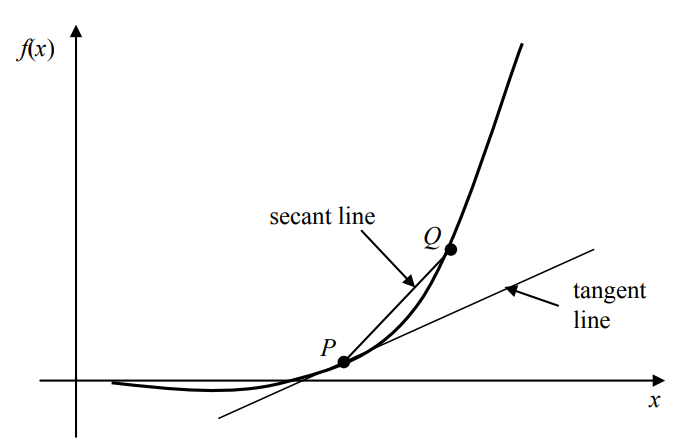

Note that the secant becomes the tangent when $Q \rightarrow P$. Most methods are characterized in terms of the *step size*, in this case the $x$ distance between P and Q.

This notion of the secant approaching the tangent  motivates the *forward difference* formula.


### Forward difference

The forward difference is so named because it starts at $x$ and looks *forward* to obtain derivative information.

Consider the Taylor expansion of $f(x)$ from a point $x_i$, with the step size $h$:


$$
\begin{align}
f(x+h) &= f(x) + f'(x) h + f''(x) \frac{h^2}{2} + f'''(x) \frac{h^3}{6}
\end{align}
$$

Consider truncating the series after the first two terms:

$$ f(x+h) = f(x) + f'(x) h + O(h^2)$$
and solve for
$$f'(x) = \frac{f(x+h) - f(x)}{h} +  O(h^2) $$


#### Example - Rocket velocity

A rocket has velocity:

$$v(t) = 2000 \ln \bigg[\frac{14 \times 10^4}{14 \times 10^4 - 2100t}\bigg] - 9.8 t$$

What is the acceleration as a function of $t$?

Analytically we can find,
$$a(t) = v'(t) = a(t) = \frac{42 \times 10^5} {14 \times 10^4 - 2100 t} - 9.8$$

In [1]:
# prompt: write a function for the v(t) and a(t) above
import numpy as np

def v(t):
  return 2000 * np.log((14 * 10**4) / (14 * 10**4 - 2100 * t)) - 9.8 * t


def a(t):
  return (42 * 10**5) / (14 * 10**4 - 2100 * t) - 9.8


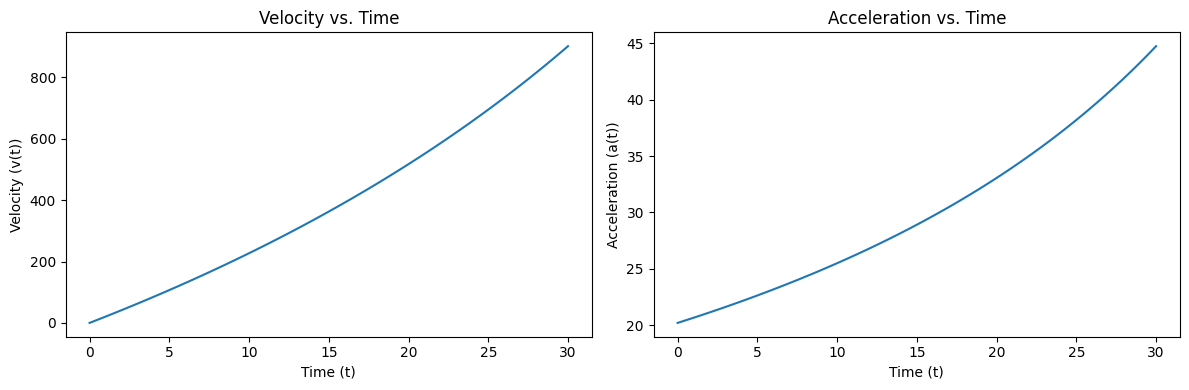

In [2]:
# prompt: Plot v(t) and a(t) from t = 0 to 30 side by side

import matplotlib.pyplot as plt
import numpy as np

# Define the time range
t = np.linspace(0, 30, 100)

# Calculate v(t) and a(t)
vt = v(t)
at = a(t)

# Create subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot v(t)
ax1.plot(t, vt)
ax1.set_xlabel('Time (t)')
ax1.set_ylabel('Velocity (v(t))')
ax1.set_title('Velocity vs. Time')

# Plot a(t)
ax2.plot(t, at)
ax2.set_xlabel('Time (t)')
ax2.set_ylabel('Acceleration (a(t))')
ax2.set_title('Acceleration vs. Time')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

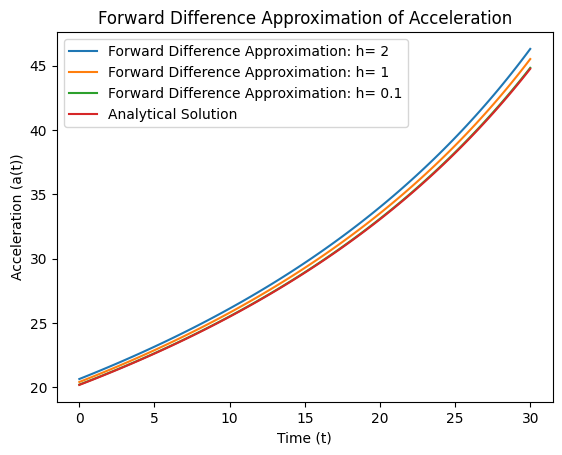

In [3]:
def forward_difference(f, x, h):
  return (f(x + h) - f(x)) / h

a_fd_h2 = forward_difference(v, t, h = 2)
a_fd_h1 = forward_difference(v, t, h = 1)
a_fd_h0p1 = forward_difference(v, t, h = 0.1)

# Plotting the results
plt.plot(t, a_fd_h2, label='Forward Difference Approximation: h= 2')
plt.plot(t, a_fd_h1, label='Forward Difference Approximation: h= 1')
plt.plot(t, a_fd_h0p1, label='Forward Difference Approximation: h= 0.1')
plt.plot(t, a(t), label='Analytical Solution')
plt.xlabel('Time (t)')
plt.ylabel('Acceleration (a(t))')
plt.title('Forward Difference Approximation of Acceleration')
plt.legend()
plt.show()

### Backward difference


By contrast, the *backward difference* steps backwards. Consider replacing $h$ with $-h$,

$$ f(x-h) = f(x) - f'(x) h + O(h^2)$$

and solve for:

$$f'(x) = \frac{f(x)- f(x-h)}{h} +  O(h^2) $$


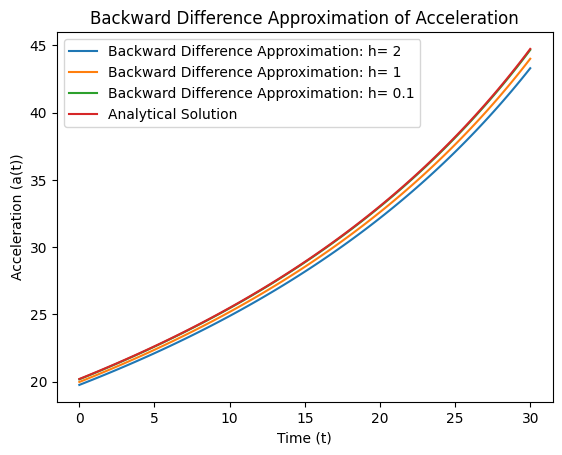

In [4]:
def backward_difference(f, x, h):
  return (f(x)- f(x - h)) / h

a_bd_h2 = backward_difference(v, t, h = 2)
a_bd_h1 = backward_difference(v, t, h = 1)
a_bd_h0p1 = backward_difference(v, t, h = 0.1)

# Plotting the results
plt.plot(t, a_bd_h2, label='Backward Difference Approximation: h= 2')
plt.plot(t, a_bd_h1, label='Backward Difference Approximation: h= 1')
plt.plot(t, a_bd_h0p1, label='Backward Difference Approximation: h= 0.1')
plt.plot(t, a(t), label='Analytical Solution')
plt.xlabel('Time (t)')
plt.ylabel('Acceleration (a(t))')
plt.title('Backward Difference Approximation of Acceleration')
plt.legend()
plt.show()

Note that the approximations are approaching the analytic solution from the other direction.

*Can we combine forward and backward differences to get a better result*?

### Central difference

Let's examine the forward and backward expansions:

$$
\begin{align}
f(x+h) &= f(x) + f'(x) h + f''(x) \frac{h^2}{2} + f'''(x)\frac{h^3}{6} + O(h^4) \\
f(x-h) &= f(x) - f'(x) h + f''(x) \frac{h^2}{2} - f'''(x)\frac{h^3}{6} + O(h^4) \\
\end{align}
$$
and subtract them:
$$
f(x+h)-f(x-h) = 2 f'(x) h + f''' \frac{h^3}{3} + O(h^5)
$$
Note that the even powers of $h$ cancel!

Rearranging this equation leads to the central difference formula:
$$
f'(x) = \frac{f(x+h)-f(x-h)}{2h} + O(h^2)
$$

which is *second order accurate in $h$* since the next correction is $h^2$!

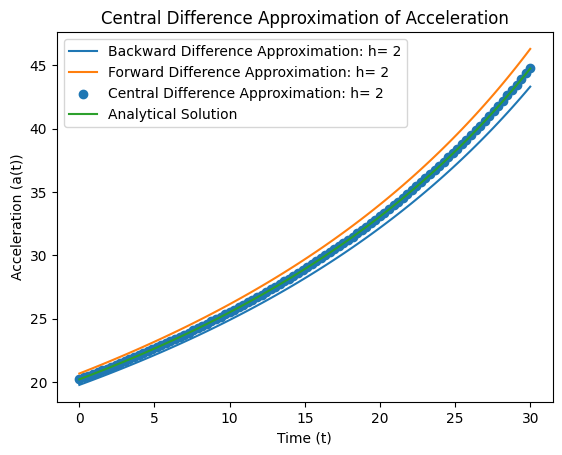

In [5]:
def central_difference(f, x, h):
  return (f(x+h)- f(x - h)) / (2*h)

a_cd_h1 = central_difference(v, t, h = 1)
a_cd_h2 = central_difference(v, t, h = 2)

# Plotting the results
plt.plot(t, a_bd_h2, label='Backward Difference Approximation: h= 2')
plt.plot(t, a_fd_h2, label='Forward Difference Approximation: h= 2')
plt.scatter(t, a_cd_h2, label='Central Difference Approximation: h= 2')
plt.plot(t, a(t), label='Analytical Solution')
plt.xlabel('Time (t)')
plt.ylabel('Acceleration (a(t))')
plt.title('Central Difference Approximation of Acceleration')
plt.legend()
plt.show()

### Comparison

Lets comare the error in forward, backward and central difference for $h=2$:

In [6]:
np.stack([a_fd_h2-a(t), a_bd_h2-a(t), a_cd_h2-a(t)]).T[1:5,:]

array([[ 0.46345415, -0.44519649,  0.00912883],
       [ 0.46776   , -0.44924984,  0.00925508],
       [ 0.47212613, -0.4533588 ,  0.00938366],
       [ 0.47655369, -0.4575244 ,  0.00951465]])

Let's see how it scales with decreasing step size between $h=2$ and $h' = 1$:

In [7]:
np.stack([a_fd_h2-a(t), a_fd_h1-a(t)]).T[1:5,:]

array([[0.46345415, 0.22936654],
       [0.46776   , 0.23148645],
       [0.47212613, 0.23363589],
       [0.47655369, 0.2358154 ]])

In [8]:
np.stack([a_bd_h2-a(t), a_bd_h1-a(t)]).T[1:5,:]

array([[-0.44519649, -0.22480399],
       [-0.44924984, -0.22686082],
       [-0.4533588 , -0.22894601],
       [-0.4575244 , -0.23106008]])

Note the error roughly cuts in half; $Error \sim \frac{h}{h'}$. Now take a look at the central difference:

In [9]:
np.stack([a_cd_h2-a(t), a_cd_h1-a(t)]).T[1:5,:]

array([[0.00912883, 0.00228127],
       [0.00925508, 0.00231281],
       [0.00938366, 0.00234494],
       [0.00951465, 0.00237766]])

See how it reduces by a factor of 4: $Error \sim \bigg[\frac{h}{h'}\bigg]^2$

The central difference algorithm:
* finds a more accurate solution in the same number of function calls.
* becomes more accurate with step size quadratically.
* requires information both before and after the point (which can be a problem at boundaries).